In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from opm import util

In [2]:
sql = '''
select pr.author as prauthor,pr.createdat,first_comment.*, strftime("%s", first_comment.date) - strftime("%s", pr.createdat) as first_comment
from (select org, repo, identifier, date, author
      from github_contribution
      where type != "PR_CREATED"
        AND author != owner
        and author not in ('codecov-commenter', 'sonarcloud', 'github-actions', 'hadoop-yetus')
      group by org, repo, identifier
      having min(date)) as first_comment
         left join github_pr as pr
                   on pr.org = first_comment.org AND pr.repo = first_comment.repo AND pr.number = first_comment.identifier
order by first_comment desc;
'''

In [3]:

conn = sqlite3.connect('sqlite-database.db')
first_comments = pd.read_sql_query(sql, conn, parse_dates=["createdat"])


In [4]:
first_comments["days"] = first_comments.first_comment / 60 / 60 / 24

In [5]:
first_comments

,prauthor,createdat,org,repo,identifier,date,author,first_comment,days
0,hgadre,2019-08-20 23:54:19+00:00,apache,hadoop,1322,2021-02-10T23:54:27Z,aajisaka,46656008,540.000093
1,shwetayakkali,2019-09-09 22:35:19+00:00,apache,hadoop,1417,2021-02-10T23:55:08Z,aajisaka,44932789,520.055428
2,bharatviswa504,2019-03-30 17:25:41+00:00,apache,hadoop,670,2019-08-21T20:20:52Z,arp7,12452111,144.121655
3,sadanand48,2021-01-25 06:47:54+00:00,apache,ozone,1840,2021-04-12T17:03:49Z,mukul1987,6689755,77.427720
4,cxorm,2020-08-07 09:20:30+00:00,apache,ozone,1301,2020-10-13T04:06:10Z,xiaoyuyao,5769940,66.781713
...,...,...,...,...,...,...,...,...,...
2786,adoroszlai,2019-10-16 04:51:38+00:00,apache,ozone,34,2019-10-16T04:52:28Z,vivekratnavel,50,0.000579
2787,dineshchitlangia,2019-10-04 20:36:28+00:00,apache,hadoop,1602,2019-10-04T20:37:14Z,anuengineer,46,0.000532
2788,hanishakoneru,2021-01-08 21:21:26+00:00,apache,ozone,1768,2021-01-08T21:21:55Z,arp7,29,0.000336
2789,elek,2021-04-09 16:56:50+00:00,apache,ozone-go,4,2021-04-09T16:57:15Z,adoroszlai,25,0.000289


## Average time until the first response on a PR

In [6]:
first_comments.days.mean()


3.0929437295141793

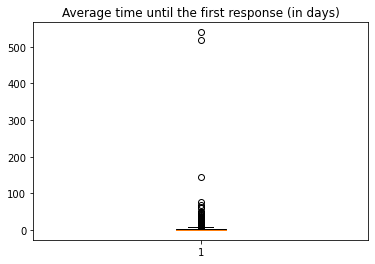

In [7]:

fig1, ax1 = plt.subplots()
ax1.set_title('Average time until the first response (in days)')
ax1.boxplot(first_comments.days)
plt.show()


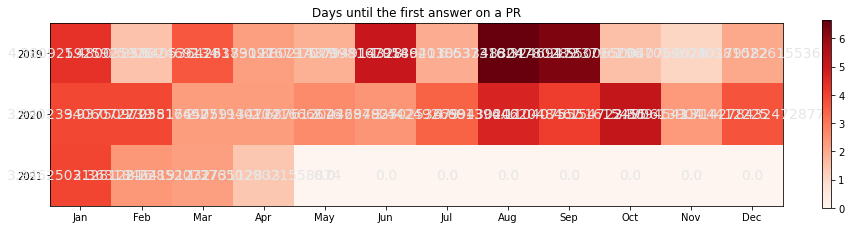

In [8]:

util.create_mosaic(util.create_pivot(first_comments,"createdat", "days", "mean"),"Reds")

plt.title("Days until the first answer on a PR")
plt.show()

## Top first responder users (excluding bots)

In [9]:
first_comments[["identifier"]].groupby(first_comments.author).count().sort_values("identifier", ascending=False).head(10)

,identifier
author,
adoroszlai,372
elek,312
bharatviswa504,279
xiaoyuyao,269
anuengineer,152
arp7,130
avijayanhwx,125
bshashikant,123
mukul1987,113


## Users who had to wait the most for the first answer

In [10]:
first_comments[["days"]].groupby(first_comments.prauthor).mean().sort_values("days", ascending=False).head(20)

,days
prauthor,
hgadre,110.785396
shwetayakkali,40.583849
jsoft88,23.966667
qizhu-lucas,14.870486
eyanghwx,12.530266
mookkiah,12.034410
cxorm,6.889217
iamabug,6.515687
symious,6.469619


## Users who had to wait the less for the first answer

In [11]:
first_comments[["days"]].groupby(first_comments.prauthor).mean().sort_values("days", ascending=True).head(20)

,days
prauthor,
virajjasani,0.002176
Tartarus0zm,0.004138
craigcondit,0.011377
john28152815,0.041759
jiwq,0.045914
harindersb,0.050567
hemanthboyina,0.052199
kennethlnnn,0.067888
snemuri,0.098924
